In [7]:
import os
import os.path
import glob
import subprocess
import pandas as pd
import os
import io
import boto3
import os.path
import json
import glob
import pandas as pd
import random
import requests
import numpy as np
from tqdm import tqdm
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from kgtk.configure_kgtk_notebooks import ConfigureKGTK
from kgtk.functions import kgtk

In [8]:
s3_client = boto3.client('s3')
bucket = 'reddit-meme-img'

In [23]:
def plot_match_data(max_len, images1, images2):
    nrows, ncols = min(7, max_len), 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
    image1, image2 = "", "" 
    for i in range(min(7, max_len)):
        print(images1[i])
        file_byte_string = s3_client.get_object(Bucket=bucket, Key=images1[i])['Body'].read()
        image1 = Image.open(io.BytesIO(file_byte_string))
        axes[i, 0].imshow(image1)
        axes[i, 0].axis('off')
        image2 = Image.open(requests.get(images2[i], stream=True).raw)
        axes[i, 1].imshow(image2)
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

meme/9ni1b6vlgidb1.jpg
HistoryMemes/iatvql2eufdb1.png
memes/bpztss6evj9b1.jpg
memes/bzrzym7ap1ab1.jpg
memes/6gvlsd9wc7cb1.jpg
memes/qnual86s3meb1.jpg
memes/jlr5yqcolnab1.jpg


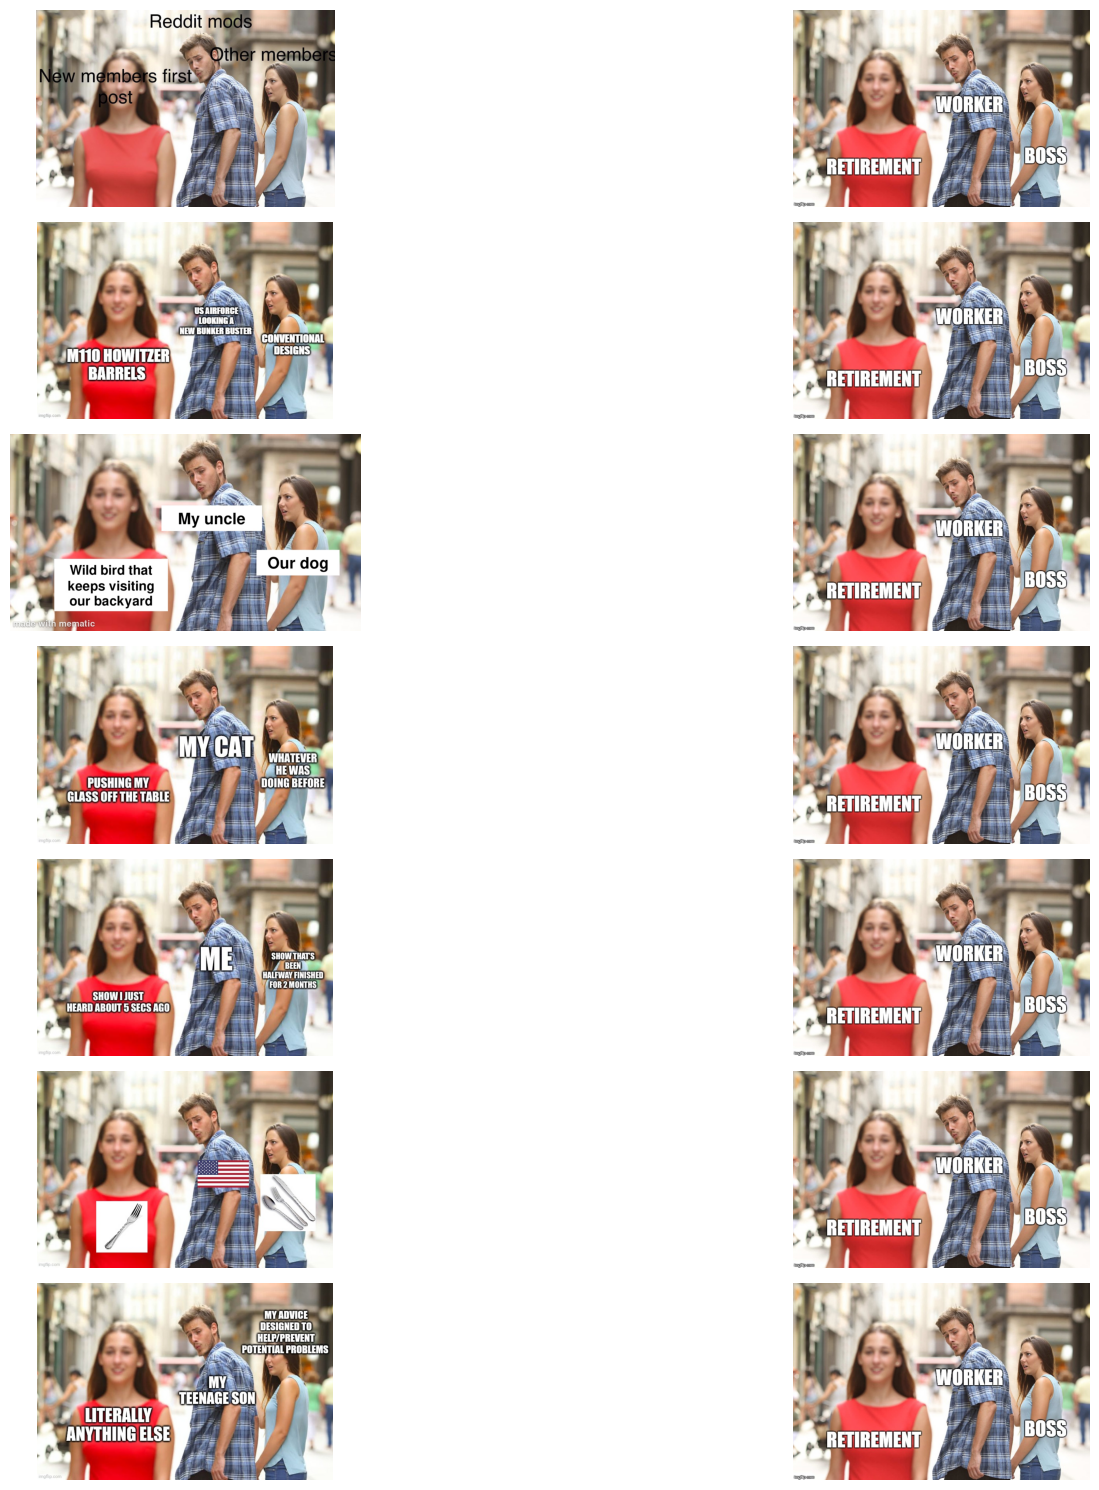

In [24]:
filtered_df = pd.read_csv('../out/filtered_df_60_final.csv')
filtered_df = filtered_df[filtered_df['imkg image']=="https://i.imgflip.com/1us54k.jpg"] 
images1 = list(filtered_df['reddit image'].values)
images2 = list(filtered_df['imkg image'].values)
plot_match_data(len(filtered_df), images1, images2)

In [2]:
input_path = "../graph/in"
output_path = "../graph/out"
project_name = "memes"

In [3]:
additional_files = {
    "imkg": "imkg.kgtk.gz", 
    "kym": "kym.kgtk.gz",
    "wiki": "wd_mini.kgtk.gz",
    "mappings": "mappings.kgtk.gz",
    "label": "labels.en.tsv.gz"
    
}

big_files = [
]

ck = ConfigureKGTK(big_files)
ck.configure_kgtk(input_graph_path=input_path, 
                  output_path=output_path, 
                  project_name=project_name,
                  additional_files=additional_files)

User home: /nas/home/syjoshi
Current dir: /nas/home/syjoshi/IMKG/analysis
KGTK dir: /nas/home/syjoshi/IMKG
Use-cases dir: /nas/home/syjoshi/IMKG/use-cases


In [4]:
ck.print_env_variables()

KGTK_GRAPH_CACHE: ../graph/out/memes/temp.memes/wikidata.sqlite3.db
KGTK_OPTION_DEBUG: false
USE_CASES_DIR: /nas/home/syjoshi/IMKG/use-cases
STORE: ../graph/out/memes/temp.memes/wikidata.sqlite3.db
KGTK_LABEL_FILE: ../graph/in/labels.en.tsv.gz
kypher: kgtk query --graph-cache ../graph/out/memes/temp.memes/wikidata.sqlite3.db
OUT: ../graph/out/memes
GRAPH: ../graph/in
kgtk: kgtk
EXAMPLES_DIR: /nas/home/syjoshi/IMKG/examples
TEMP: ../graph/out/memes/temp.memes
imkg: ../graph/in/imkg.kgtk.gz
kym: ../graph/in/kym.kgtk.gz
wiki: ../graph/in/wd_mini.kgtk.gz
mappings: ../graph/in/mappings.kgtk.gz
label: ../graph/in/labels.en.tsv.gz


In [5]:
ck.load_files_into_cache()

kgtk query --graph-cache ../graph/out/memes/temp.memes/wikidata.sqlite3.db -i "../graph/in/imkg.kgtk.gz" --as imkg  -i "../graph/in/kym.kgtk.gz" --as kym  -i "../graph/in/wd_mini.kgtk.gz" --as wiki  -i "../graph/in/mappings.kgtk.gz" --as mappings  -i "../graph/in/labels.en.tsv.gz" --as label  --limit 3
input alias 'imkg' already in use


In [27]:
%%time
!kgtk query -i $imkg \
    --match '(n1:`imgflipi:1us54k`)-[r]->(n2)' 

node1	label	node2
imgflipi:1us54k	imgflipr:alt_text	Disloyal Boyfriend \|  WORKER; BOSS; RETIREMENT \| image tagged in disloyal boyfriend \| made w/ Imgflip meme maker
imgflipi:1us54k	imgflipr:author	imgflipuser:damagedgood
imgflipi:1us54k	imgflipr:image_url	https://i.imgflip.com/1us54k.jpg
imgflipi:1us54k	imgflipr:template	imgflipmeme:112006116/Disloyal-Boyfriend
imgflipi:1us54k	imgflipr:templateId	112006116
imgflipi:1us54k	imgflipr:template_title	Disloyal Boyfriend
imgflipi:1us54k	imgflipr:title	Disloyal Boyfriend
imgflipi:1us54k	imgflipr:upvote_count	7
imgflipi:1us54k	imgflipr:view_count	2,618
imgflipi:1us54k	m4s:fromCaption	Q584991
imgflipi:1us54k	m4s:fromCaption	Q622404
CPU times: user 41.5 ms, sys: 22.6 ms, total: 64.2 ms
Wall time: 2.53 s
